In [50]:
print('Written Description: Trend 1: There is a negative correlation between latitude and temperature for both hemispheres when looking at them collectively, as you get further from the equator the temperature decreases. Trend 2: Humidity is interesting as in the Northern Hemisphere it increases the further you get from the equator, while in the Southern hemisphere it decreases as you get closer to the equator showing an inverse relationship relative to the equator. Trend 3: The wind conditions pick up to higher speeds the further you get from the equator in both hemispheres ')

Written Description: Trend 1: There is a negative correlation between latitude and temperature for both hemispheres when looking at them collectively, as you get further from the equator the temperature decreases. Trend 2: Humidity is interesting as in the Northern Hemisphere it increases the further you get from the equator, while in the Southern hemisphere it decreases as you get closer to the equator showing an inverse relationship relative to the equator. Trend 3: The wind conditions pick up to higher speeds the further you get from the equator in both hemispheres 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from scipy import stats
from api_config import (weather_api)

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
from citipy import citipy

In [4]:
cities_list= []
record_number = 0
cloud=[]
country=[]
date=[]
humidity=[]
max_temp=[]
wind_speed=[]
lat=[]
lon= []

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [6]:
output_data_file = "cities.csv"

In [7]:
print(output_data_file)

cities.csv


In [8]:
data = pd.read_csv(output_data_file)
data

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [9]:
data_df = pd.DataFrame(data)
data_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [11]:

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

for c in range(len(cities)):
    try:
        spec_url=cities[c]
        query_url = f"{url}appid={weather_api}&q={spec_url}&units=imperial"
        weather_response = requests.get(query_url).json()
        cities_list.append(weather_response["name"])
        cloud.append(weather_response['clouds']['all'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        humidity.append(weather_response['main']['humidity'])
        max_temp.append(weather_response['main']['temp_max'])
        wind_speed.append(weather_response['wind']['speed'])
        lat.append(weather_response['coord']['lat'])
        lon.append(weather_response['coord']['lon'])
        record_number += 1
        print(f"Processing Record {record_number} | {weather_response['name']}")
    except KeyError:
        print('City not found. Skipping...')
print (cities_list)

Processing Record 1 | Chui
Processing Record 2 | Hofn
Processing Record 3 | Hong Kong
Processing Record 4 | Avarua
Processing Record 5 | Iralaya
Processing Record 6 | Santa Isabel
Processing Record 7 | Lüderitz
Processing Record 8 | Guasdualito
Processing Record 9 | Thompson
Processing Record 10 | Ushuaia
Processing Record 11 | São José da Coroa Grande
Processing Record 12 | Beringovskiy
Processing Record 13 | Lasem
Processing Record 14 | Gillette
Processing Record 15 | Conceição do Araguaia
Processing Record 16 | Baracoa
Processing Record 17 | Nicoya
Processing Record 18 | Bluff
Processing Record 19 | Ribeira Grande
Processing Record 20 | Punta Arenas
Processing Record 21 | New Norfolk
Processing Record 22 | Sotik Post
Processing Record 23 | Airai
Processing Record 24 | Tasiilaq
City not found. Skipping...
Processing Record 25 | Cape Town
Processing Record 26 | Kaitangata
Processing Record 27 | Benghazi
Processing Record 28 | Rio Pomba
Processing Record 29 | Talnakh
Processing Record 

Processing Record 232 | Olinda
Processing Record 233 | Mahébourg
Processing Record 234 | Rantauprapat
Processing Record 235 | Impfondo
Processing Record 236 | Te Anau
Processing Record 237 | Jumla
Processing Record 238 | Husavik
Processing Record 239 | Benguela
Processing Record 240 | Amapá
Processing Record 241 | Flin Flon
Processing Record 242 | Naze
Processing Record 243 | Torbay
Processing Record 244 | Hay River
Processing Record 245 | Saint Paul Harbor
Processing Record 246 | Otukpo
Processing Record 247 | Forsytheganj
Processing Record 248 | Kafanchan
Processing Record 249 | Hasaki
Processing Record 250 | Mangai
Processing Record 251 | Havelock
Processing Record 252 | Sechura
Processing Record 253 | Cabo San Lucas
Processing Record 254 | Tual
Processing Record 255 | Pochutla
Processing Record 256 | Quatre Cocos
Processing Record 257 | São Filipe
Processing Record 258 | Bakel
Processing Record 259 | Aklavik
Processing Record 260 | Portsmouth
Processing Record 261 | Wuwei
Processin

Processing Record 458 | Mineros
Processing Record 459 | Itarema
Processing Record 460 | Florianópolis
Processing Record 461 | Rome
Processing Record 462 | Weligama
Processing Record 463 | Baní
Processing Record 464 | Port Hardy
Processing Record 465 | Sakakah
Processing Record 466 | Dekar
Processing Record 467 | Porkhov
Processing Record 468 | Verkhnevilyuysk
Processing Record 469 | Kavaratti
Processing Record 470 | Mayma
Processing Record 471 | Brazzaville
Processing Record 472 | Kimbe
Processing Record 473 | Atambua
Processing Record 474 | Coahuayana Viejo
Processing Record 475 | Bechem
Processing Record 476 | Shizunai-furukawachō
Processing Record 477 | Cairns
Processing Record 478 | Opoczno
Processing Record 479 | Paso de Carrasco
Processing Record 480 | Kankan
Processing Record 481 | Tambura
City not found. Skipping...
Processing Record 482 | Evensk
Processing Record 483 | Ixtapa
Processing Record 484 | Jatai
Processing Record 485 | Yar-Sale
Processing Record 486 | Fort Nelson
Pro

In [12]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities_list,
    "lon": lon,
    "lat": lat,
    "wind_speed": wind_speed,
    "max_temp": max_temp,
    "humidity": humidity,
    "date": date,
    "country": country,
    "cloud": cloud
}
weather_data = pd.DataFrame(weather_dict)
weather_data


,city,lon,lat,wind_speed,max_temp,humidity,date,country,cloud
0,Chui,-53.46,-33.70,14.50,67.91,83,1584510866,UY,100
1,Hofn,-15.21,64.25,31.74,35.15,96,1584510866,IS,97
2,Hong Kong,114.16,22.29,4.70,73.99,83,1584510676,HK,40
3,Avarua,-159.78,-21.21,16.11,80.60,88,1584510867,CK,100
4,Iralaya,-83.23,15.00,15.39,79.61,79,1584510867,HN,8
...,...,...,...,...,...,...,...,...,...
552,Aginskoye,114.53,51.10,23.67,36.05,29,1584511001,RU,37
553,Xiongyue,122.12,40.18,20.76,61.43,28,1584511001,CN,55
554,Calbuco,-73.13,-41.77,2.24,46.40,100,1584511002,CL,90
555,Ţahţā,31.50,26.77,14.99,55.40,58,1584511002,EG,0


In [53]:
weather_data.to_csv('weather.csv')

In [13]:
weather_data

,city,lon,lat,wind_speed,max_temp,humidity,date,country,cloud
0,Chui,-53.46,-33.70,14.50,67.91,83,1584510866,UY,100
1,Hofn,-15.21,64.25,31.74,35.15,96,1584510866,IS,97
2,Hong Kong,114.16,22.29,4.70,73.99,83,1584510676,HK,40
3,Avarua,-159.78,-21.21,16.11,80.60,88,1584510867,CK,100
4,Iralaya,-83.23,15.00,15.39,79.61,79,1584510867,HN,8
...,...,...,...,...,...,...,...,...,...
552,Aginskoye,114.53,51.10,23.67,36.05,29,1584511001,RU,37
553,Xiongyue,122.12,40.18,20.76,61.43,28,1584511001,CN,55
554,Calbuco,-73.13,-41.77,2.24,46.40,100,1584511002,CL,90
555,Ţahţā,31.50,26.77,14.99,55.40,58,1584511002,EG,0


In [14]:
north_weather_data = weather_data[(weather_data.lat >= 0)]
north_weather_data


,city,lon,lat,wind_speed,max_temp,humidity,date,country,cloud
1,Hofn,-15.21,64.25,31.74,35.15,96,1584510866,IS,97
2,Hong Kong,114.16,22.29,4.70,73.99,83,1584510676,HK,40
4,Iralaya,-83.23,15.00,15.39,79.61,79,1584510867,HN,8
7,Guasdualito,-70.73,7.24,7.07,77.99,47,1584510867,VE,55
8,Thompson,-97.86,55.74,5.82,-11.20,63,1584510868,CA,5
...,...,...,...,...,...,...,...,...,...
551,Beidao,105.89,34.57,7.40,62.87,15,1584511000,CN,100
552,Aginskoye,114.53,51.10,23.67,36.05,29,1584511001,RU,37
553,Xiongyue,122.12,40.18,20.76,61.43,28,1584511001,CN,55
555,Ţahţā,31.50,26.77,14.99,55.40,58,1584511002,EG,0


In [15]:
south_weather_data = weather_data[(weather_data.lat < 0)]
south_weather_data

,city,lon,lat,wind_speed,max_temp,humidity,date,country,cloud
0,Chui,-53.46,-33.70,14.50,67.91,83,1584510866,UY,100
3,Avarua,-159.78,-21.21,16.11,80.60,88,1584510867,CK,100
5,Santa Isabel,-46.22,-23.32,0.76,69.80,100,1584510867,BR,40
6,Lüderitz,15.16,-26.65,6.93,59.00,87,1584510867,NA,0
9,Ushuaia,-68.30,-54.80,3.42,53.60,58,1584510806,AR,40
...,...,...,...,...,...,...,...,...,...
535,Buala,159.59,-8.14,3.83,83.39,77,1584510997,SB,69
537,Emerald,148.17,-23.53,13.87,86.00,33,1584510998,AU,0
545,Kempsey,152.83,-31.08,5.01,75.00,62,1584510999,AU,1
546,Touros,-35.46,-5.20,4.70,77.00,94,1584511000,BR,40


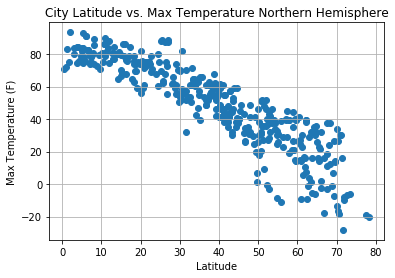

<Figure size 432x288 with 0 Axes>

In [16]:
# Build a scatter plot for each data type
plt.scatter(north_weather_data["lat"], north_weather_data["max_temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature Northern Hemisphere")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

plt.savefig('city_lat_max_temp.png')

In [17]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_weather_data["lat"], north_weather_data["max_temp"])

# Get regression values
regress_values = north_weather_data["lat"] * slope + intercept
print(regress_values)

1      18.321642
2      67.926066
4      76.544184
7      85.717929
8      28.382024
         ...    
551    53.408851
552    33.867356
553    46.776801
555    62.629883
556    16.607475
Name: lat, Length: 375, dtype: float64


In [18]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.18x +94.28


The r-squared is: -0.8925411814750206


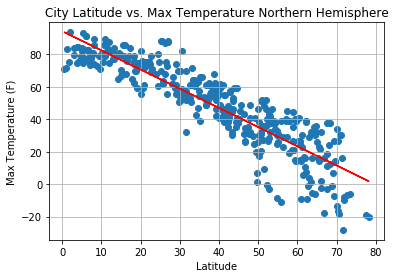

<Figure size 432x288 with 0 Axes>

In [19]:
 # Create Plot
plt.scatter(north_weather_data["lat"], north_weather_data["max_temp"], marker="o")
plt.plot(north_weather_data["lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Max Temperature Northern Hemisphere")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

plt.savefig('city_lat_max_temp_reg.png')

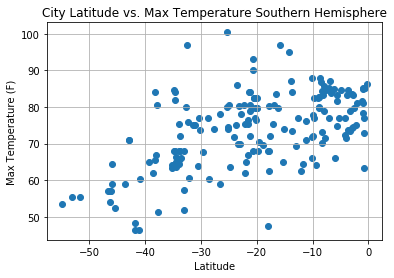

<Figure size 432x288 with 0 Axes>

In [20]:
# Build a scatter plot for each data type
plt.scatter(south_weather_data["lat"], south_weather_data["max_temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature Southern Hemisphere")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

plt.savefig('city_lat_max_temp_south.png')

In [21]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_weather_data["lat"], south_weather_data["max_temp"])

# Get regression values
regress_values = south_weather_data["lat"] * slope + intercept
print(regress_values)

0      68.323597
3      73.609228
5      72.716299
6      71.307080
9      59.394308
         ...    
535    79.140309
537    72.627430
545    69.432352
546    80.384485
554    64.908461
Name: lat, Length: 182, dtype: float64


In [22]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.42x +82.59


The r-squared is: 0.5534817646447338


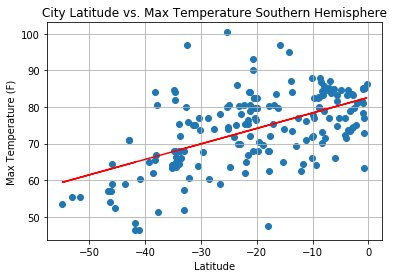

This plot is showing that cities closer to the equator have higher max temperatures. The southern hemisphere has a positive correlation between latitute and max temp, while the northern hemisphere has a negative correlation. In both cases, as you get further away from the equator temperature decreases, the correlation difference is due to the change between a positive or negative number based on northern or southern hemisphere.


<Figure size 432x288 with 0 Axes>

In [23]:
 # Create Plot
plt.scatter(south_weather_data["lat"], south_weather_data["max_temp"], marker="o")
plt.plot(south_weather_data["lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Max Temperature Southern Hemisphere")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

plt.savefig('city_lat_max_temp_south_reg.png')

print('This plot is showing that cities closer to the equator have higher max temperatures. The southern hemisphere has a positive correlation between latitute and max temp, while the northern hemisphere has a negative correlation. In both cases, as you get further away from the equator temperature decreases, the correlation difference is due to the change between a positive or negative number based on northern or southern hemisphere.')

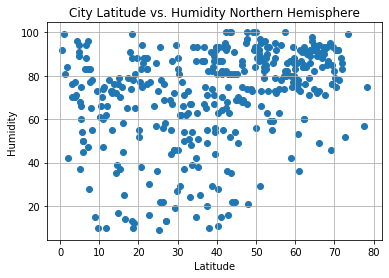

<Figure size 432x288 with 0 Axes>

In [24]:
# Build a scatter plot for each data type
plt.scatter(north_weather_data["lat"], north_weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity Northern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

plt.savefig('city_lat_humidity_north.png')

In [25]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_weather_data["lat"], north_weather_data["humidity"])

# Get regression values
regress_values = north_weather_data["lat"] * slope + intercept
print(regress_values)

1      79.641321
2      64.736455
4      62.146930
7      59.390453
8      76.618433
         ...    
551    69.098508
552    74.970230
553    71.091270
555    66.327823
556    80.156385
Name: lat, Length: 375, dtype: float64


In [26]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.36x +56.82


The r-squared is: 0.31476758056301896


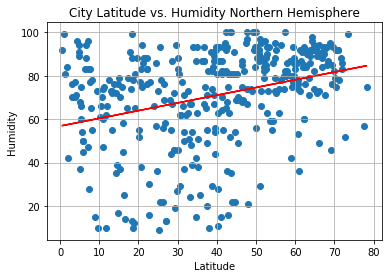

<Figure size 432x288 with 0 Axes>

In [27]:
 # Create Plot
plt.scatter(north_weather_data["lat"], north_weather_data["humidity"], marker="o")
plt.plot(north_weather_data["lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Humidity Northern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

plt.savefig('city_lat_humidity_north_reg.png')

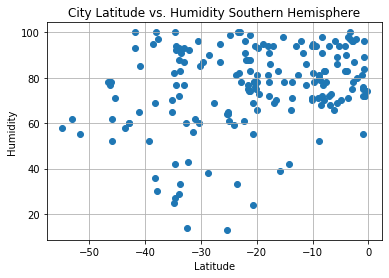

<Figure size 432x288 with 0 Axes>

In [28]:
# Build a scatter plot for each data type
plt.scatter(south_weather_data["lat"], south_weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity Southern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

plt.savefig('city_lat_humidity_south.png')

In [29]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_weather_data["lat"], south_weather_data["humidity"])

# Get regression values
regress_values = south_weather_data["lat"] * slope + intercept
print(regress_values)

0      71.067383
3      75.818318
5      75.015718
6      73.749056
9      63.041384
         ...    
535    80.789873
537    74.935839
545    72.063976
546    81.908187
554    67.997724
Name: lat, Length: 182, dtype: float64


In [30]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.38x +83.89


The r-squared is: 0.2817182448433008


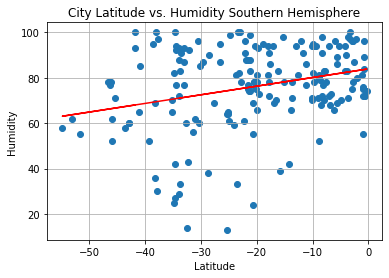

Based on the data collected during this pull of 500+ cities it appears that both hemispheres have positive correlations between latitude and humidity. In the Southern Hemisphere we see as you get closer to the equator it becomes more humid. In the northern hemisphere as you get further from the equator it becomes more humid.


<Figure size 432x288 with 0 Axes>

In [31]:
 # Create Plot
plt.scatter(south_weather_data["lat"], south_weather_data["humidity"], marker="o")
plt.plot(south_weather_data["lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Humidity Southern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

plt.savefig('city_lat_humidity_south_reg.png')

print("Based on the data collected during this pull of 500+ cities it appears that both hemispheres have positive correlations between latitude and humidity. In the Southern Hemisphere we see as you get closer to the equator it becomes more humid. In the northern hemisphere as you get further from the equator it becomes more humid.")

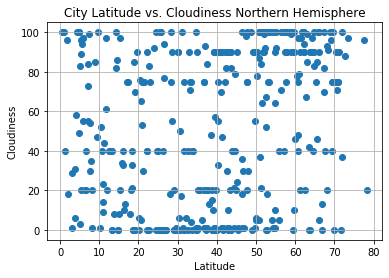

<Figure size 432x288 with 0 Axes>

In [32]:
# Build a scatter plot for each data type
plt.scatter(north_weather_data["lat"], north_weather_data["cloud"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness Northern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

plt.savefig('city_lat_cloud_north.png')

In [33]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_weather_data["lat"], north_weather_data["cloud"])

# Get regression values
regress_values = north_weather_data["lat"] * slope + intercept
print(regress_values)

1      63.314477
2      44.554237
4      41.294891
7      37.825408
8      59.509672
         ...    
551    50.044603
552    57.435136
553    52.552823
555    46.557236
556    63.962770
Name: lat, Length: 375, dtype: float64


In [34]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.45x +34.59


The r-squared is: 0.23126414013813373


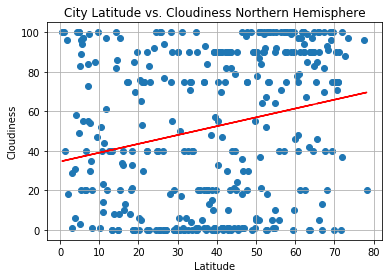

<Figure size 432x288 with 0 Axes>

In [35]:
# Create Plot
plt.scatter(north_weather_data["lat"], north_weather_data["cloud"], marker="o")
plt.plot(north_weather_data["lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Cloudiness Northern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

plt.savefig('city_lat_cloud_north_reg.png')

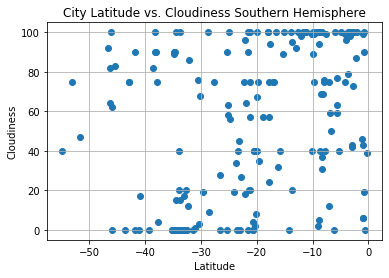

<Figure size 432x288 with 0 Axes>

In [36]:
# Build a scatter plot for each data type
plt.scatter(south_weather_data["lat"], south_weather_data["cloud"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness Southern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

plt.savefig('city_lat_cloud_south.png')

In [37]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_weather_data["lat"], south_weather_data["cloud"])

# Get regression values
regress_values = south_weather_data["lat"] * slope + intercept
print(regress_values)

0      45.684986
3      54.662162
5      53.145602
6      50.752167
9      30.519381
         ...    
535    64.056213
537    52.994664
545    47.568109
546    66.169335
554    39.884682
Name: lat, Length: 182, dtype: float64


In [38]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.72x +69.91


The r-squared is: 0.25810322992626605


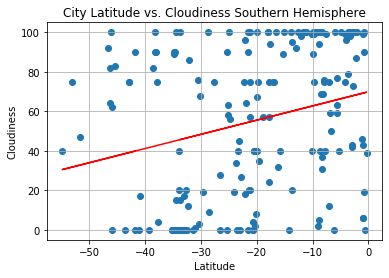

Both hemispheres have positive correlations between latitudes and cloudiness. In the Southern Hemisphere as you get closer to the equator there are more clouds.  In the Northern Hemisphere as you get further from the equator there are more clouds.


<Figure size 432x288 with 0 Axes>

In [39]:
# Create Plot
plt.scatter(south_weather_data["lat"], south_weather_data["cloud"], marker="o")
plt.plot(south_weather_data["lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Cloudiness Southern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

plt.savefig('city_lat_cloud_south_reg.png')

print('Both hemispheres have positive correlations between latitudes and cloudiness. In the Southern Hemisphere as you get closer to the equator there are more clouds.  In the Northern Hemisphere as you get further from the equator there are more clouds.')

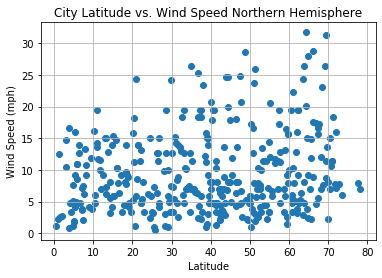

<Figure size 432x288 with 0 Axes>

In [40]:
# Build a scatter plot for each data type
plt.scatter(north_weather_data["lat"], north_weather_data["wind_speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed Northern Hemisphere")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

plt.savefig('city_lat_wind_north.png')

In [41]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_weather_data["lat"], north_weather_data["wind_speed"])

# Get regression values
regress_values = north_weather_data["lat"] * slope + intercept
print(regress_values)

1      10.760729
2       8.563626
4       8.181909
7       7.775581
8      10.315130
         ...    
551     9.206630
552    10.072171
553     9.500380
555     8.798207
556    10.836654
Name: lat, Length: 375, dtype: float64


In [42]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.05x +7.4


The r-squared is: 0.16513986341591155


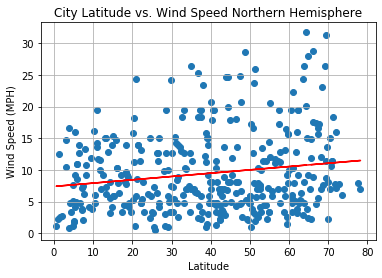

<Figure size 432x288 with 0 Axes>

In [43]:
# Create Plot
plt.scatter(north_weather_data["lat"], north_weather_data["wind_speed"], marker="o")
plt.plot(north_weather_data["lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Wind Speed Northern Hemisphere")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

plt.savefig('city_lat_wind_north_reg.png')


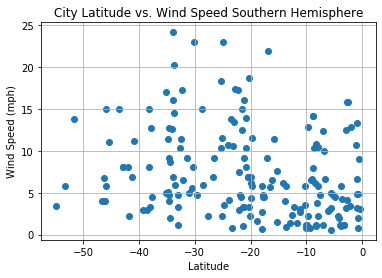

<Figure size 432x288 with 0 Axes>

In [44]:
# Build a scatter plot for each data type
plt.scatter(south_weather_data["lat"], south_weather_data["wind_speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed Southern Hemisphere")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

plt.savefig('city_lat_wind_south.png')

In [45]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_weather_data["lat"], south_weather_data["wind_speed"])

# Get regression values
regress_values = south_weather_data["lat"] * slope + intercept
print(regress_values)

0       8.469315
3       7.317833
5       7.512359
6       7.819359
9      10.414573
         ...    
535     6.112879
537     7.531719
545     8.227771
546     5.841833
554     9.213307
Name: lat, Length: 182, dtype: float64


In [46]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.09x +5.36


The r-squared is: -0.23752455133410771


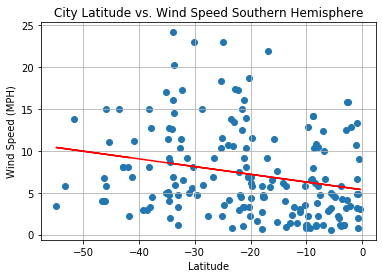

In the Northern Hemisphere as you get further from the equator wind speed picks up, conversly in the Southern Hemisphere as you get closer to the equator the wind speed slows down.


In [47]:
# Create Plot
plt.scatter(south_weather_data["lat"], south_weather_data["wind_speed"], marker="o")
plt.plot(south_weather_data["lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Wind Speed Southern Hemisphere")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

print('In the Northern Hemisphere as you get further from the equator wind speed picks up, conversly in the Southern Hemisphere as you get closer to the equator the wind speed slows down.')
